# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan adalah [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) dari Kaggle.
Dataset ini berisi data pelanggan layanan telekomunikasi, dengan target prediksi churn (`Churn`: Yes/No).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
import shutil
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Jumlah baris awal:", df.shape)
df.head()

Jumlah baris awal: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


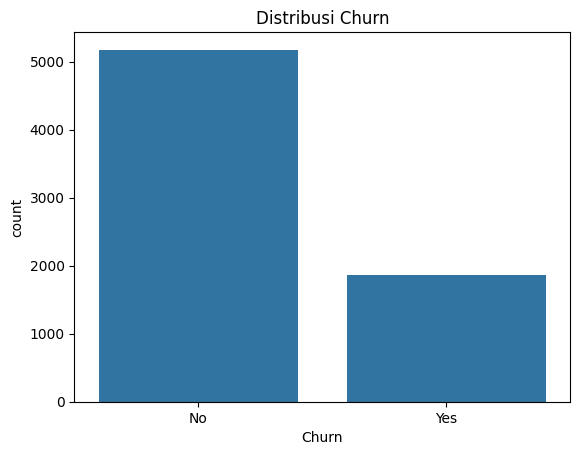

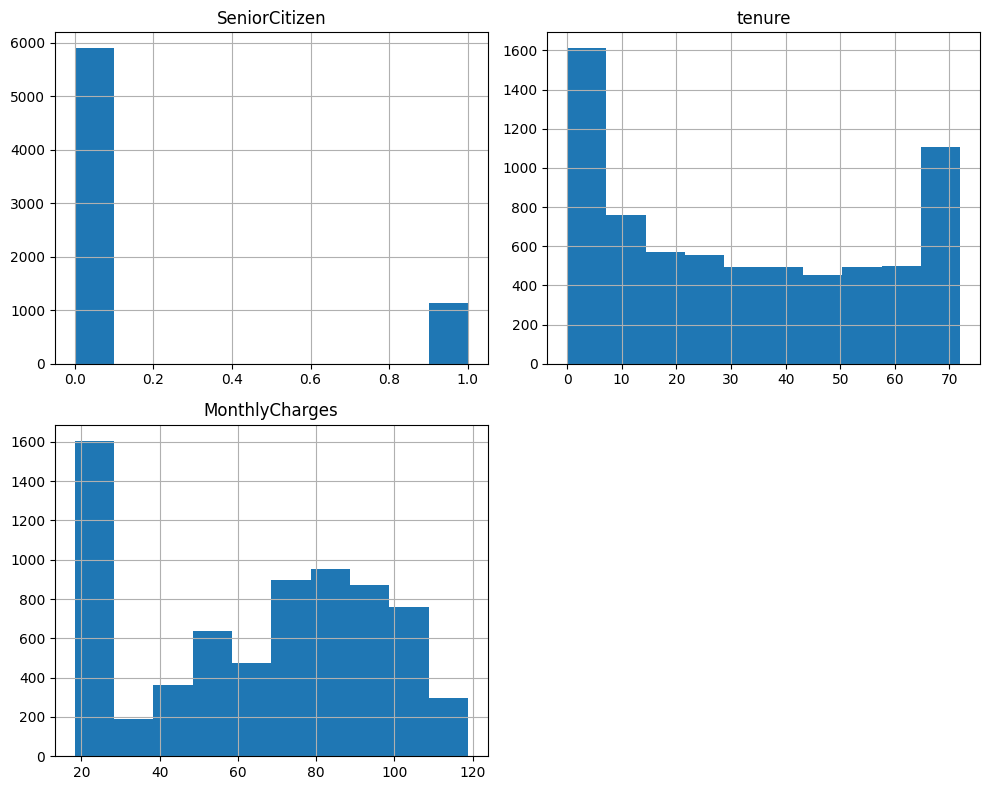


customerID:
 customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

gender:
 gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner:
 Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
 PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines:
 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService:
 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity:
 OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup:
 OnlineBackup
No                     3088
Yes       

In [3]:
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

# Distribusi target
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn')
plt.show()

# Distribusi fitur numerik
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Cek data kategorikal
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"\n{col}:\n", df[col].value_counts())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
print(df['TotalCharges'].head(10))
print(df['TotalCharges'].unique())

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Jumlah NaN di TotalCharges:", df['TotalCharges'].isna().sum())
df = df.dropna(subset=['TotalCharges']).copy()
print("Jumlah baris setelah dropna:", df.shape)

Jumlah NaN di TotalCharges: 11
Jumlah baris setelah dropna: (7032, 21)


In [6]:
# Hapus duplikasi
df = df.drop_duplicates()

# Ubah target ke numerik
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['Churn'])

# Encoding fitur kategorikal
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'customerID' in cat_cols:
    cat_cols.remove('customerID')

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Standarisasi fitur numerik
from sklearn.preprocessing import StandardScaler
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Split data train-test
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Simpan hasil preprocessing
import os
os.makedirs('namadataset_preprocessing', exist_ok=True)
pd.concat([X_train, y_train], axis=1).to_csv('namadataset_preprocessing/train.csv', index=False)
pd.concat([X_test, y_test], axis=1).to_csv('namadataset_preprocessing/test.csv', index=False)

In [7]:
# Nama folder yang ingin didownload
folder_name = 'namadataset_preprocessing'
zip_name = f'{folder_name}.zip'

# Hapus file zip lama jika ada
if os.path.exists(zip_name):
    os.remove(zip_name)

# Kompres folder menjadi zip
shutil.make_archive(folder_name, 'zip', folder_name)

'/content/namadataset_preprocessing.zip'